In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('/Users/rajatmaliwal2913/Downloads/Perovskite_Stability_with_features.csv')
data.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1


In [35]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data.columns = [c.replace('#', '') for c in data.columns]
data.columns = [c.replace('.', '') for c in data.columns]

In [36]:
data = data.drop(['X_site','B_site_3', 'A_site_3','A_site_2', 'B_site_2', 'Asite_IsBoron_weighted_avg','Asite_IsHalogen_weighted_avg', 'host_Asite0_IsCubic','Asite_IsPnictide_weighted_avg' ,'host_Asite0_IsAlkali', 'host_Asite0_NsValence', 'host_Bsite0_IsNoblegas', 'Bsite_IsMetal_max', 'Asite_GSmagmom_min', 'Material_Composition', 'ICSDVolume_AB_avg', 'First_Ionization_Potential_(V)_AB_avg', 'Asite_Atomic_Volume_(cm³/mol)_max','Asite_IsAlkali_max','host_Bsite0_At_'], axis = 1)

data = data.drop(['X_site','B_site_3', 'A_site_3','A_site_2', 'B_site_2', 'Asite_IsBoron_weighted_avg','Asite_IsHalogen_weighted_avg', 'host_Asite0_IsCubic','Asite_IsPnictide_weighted_avg' ,'host_Asite0_IsAlkali', 'host_Asite0_NsValence', 'host_Bsite0_IsNoblegas', 'Bsite_IsMetal_max', 'Asite_GSmagmom_min'], axis = 1)

'Material_Composition', 'ICSDVolume_AB_avg', 'First_Ionization_Potential_(V)_AB_avg', 'Asite_Atomic_Volume_(cm³/mol)_max','Asite_IsAlkali_max','host_Bsite0_At_'

In [37]:
y = data.iloc[:, data.columns == 'energy_above_hull_(meV/atom)'].values
X = data.drop("energy_above_hull_(meV/atom)", axis = 1)
print(X.shape)
print(y)

(1929, 60)
[[ 29.74770732]
 [106.702335  ]
 [171.6080933 ]
 ...
 [  0.        ]
 [  0.        ]
 [  0.        ]]


In [38]:
cols = ['A_site_1', 'B_site_1']
X[cols] = X[cols].apply(lambda x: pd.factorize(x)[0] + 1)


In [39]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X1, X_test, y1, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


print("X_train shape:", X1.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y1.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1543, 60)
X_test shape: (386, 60)
y_train shape: (1543, 1)
y_test shape: (386, 1)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
X_test_scaled = scaler.transform(X_test)
X_scaled_df = pd.DataFrame(X_scaled, columns=X1.columns)

Epoch 1/300


/Users/rajatmaliwal2913/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18994.1816 - mse: 18994.1816 - val_loss: 17966.1367 - val_mse: 17966.1367
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 18120.3047 - mse: 18120.3047 - val_loss: 10154.7363 - val_mse: 10154.7363
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 7532.3838 - mse: 7532.3838 - val_loss: 4705.4253 - val_mse: 4705.4253
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 5157.9390 - mse: 5157.9390 - val_loss: 4119.1230 - val_mse: 4119.1230
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 3146.1667 - mse: 3146.1667 - val_loss: 4039.7258 - val_mse: 4039.7258
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 3987.6221 - mse: 3987.6221 - val_loss: 3870.6731 - val_mse: 3870.6731
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 3076.0220 - mse: 3076.0220 - val_loss: 3704.6243 - val_mse: 3704.6243
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 3618.3052 - mse: 3618.3052 -

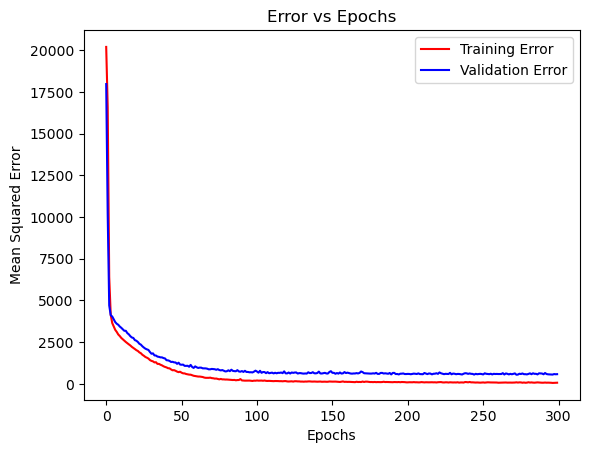

In [60]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(64, input_dim=X_scaled_df.shape[1], activation='relu', name = 'L1')),
model.add(Dense(32, activation='relu', name = 'L2')),
model.add(Dense(16, activation='relu', name = 'L3')),
model.add(Dense(4, activation='relu', name = 'L4')),
model.add(Dense(1, activation='linear', name = 'L5'))


model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mse'])

history = model.fit(X_scaled_df, y1, epochs=300, batch_size=32, validation_split = 0.2, verbose=1)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


plt.plot(history.history['loss'], color='red', label='Training Error')
plt.plot(history.history['val_loss'], color='blue', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()


In [61]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 64)             │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L5 (Dense)                      │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,757 (77.18 KB)

 Trainable params: 6,585 (25.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,172 (51.46 KB)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = X1.corr()
print(correlation_matrix)

                            Material_Composition  A_site_1  B_site_1  \
Material_Composition                    1.000000  0.971818 -0.085744   
A_site_1                                0.971818  1.000000 -0.118264   
B_site_1                               -0.085744 -0.118264  1.000000   
Number_of_elements                     -0.135249 -0.069458 -0.088139   
formation_energy_(eV/atom)             -0.199041 -0.180669 -0.335368   
...                                          ...       ...       ...   
host_Asite0_IsBCC                      -0.653631 -0.723953  0.126206   
host_Asite0_OrbitalD                    0.275912  0.288531 -0.028755   
host_Bsite0_At_                        -0.266540 -0.295327  0.140302   
host_Bsite0_IsHexagonal                 0.009882 -0.001879  0.189595   
Asite_IsAlkali_max                     -0.362323 -0.370298 -0.092366   

                            Number_of_elements  formation_energy_(eV/atom)  \
Material_Composition                 -0.135249           

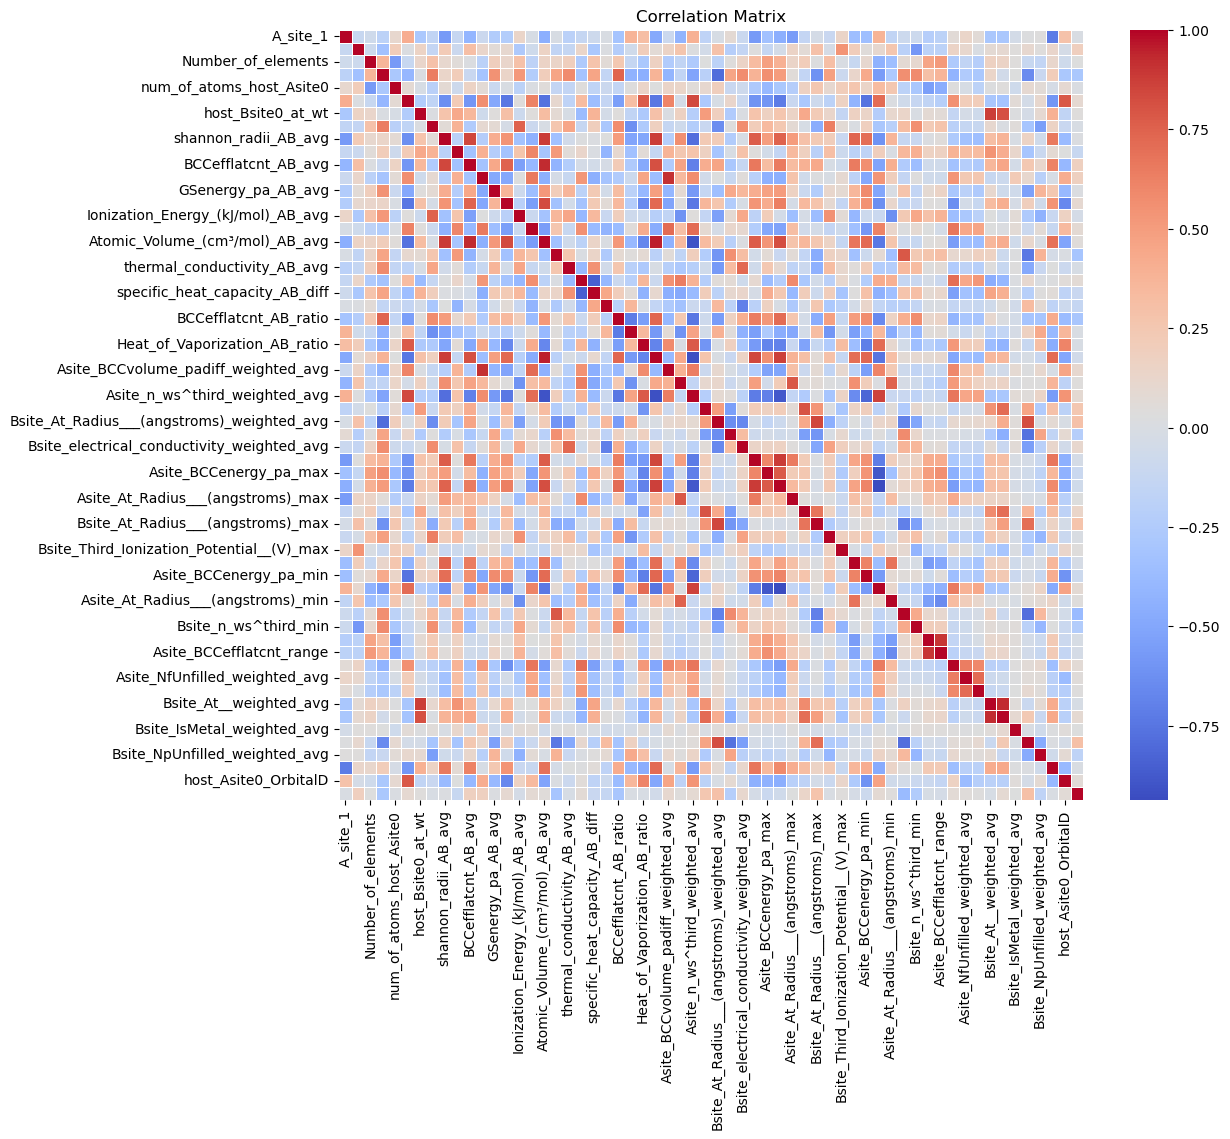

In [70]:
correlation_matrix = X1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/Users/rajatmaliwal2913/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19946.5684 - mse: 19946.5684 - val_loss: 17180.7520 - val_mse: 17180.7520
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 16898.5801 - mse: 16898.5801 - val_loss: 11377.8311 - val_mse: 11377.8311
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 9461.5811 - mse: 9461.5811 - val_loss: 5162.0649 - val_mse: 5162.0649
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 4446.6895 - mse: 4446.6895 - val_loss: 4542.6377 - val_mse: 4542.6377
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 3388.5361 - mse: 3388.5361 - val_loss: 4286.3457 - val_mse: 4286.3457
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4417.4731 - mse: 4417.4731 - val_loss: 4072.0740 - val_mse: 4072.0740
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 4188.1836 - mse: 4188.1836 - val_loss: 3976.4089 - val_mse: 3976.4089
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 2736.9092 - mse: 2

/Users/rajatmaliwal2913/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12742.2871 - mse: 12742.2871 - val_loss: 6817.7231 - val_mse: 6817.7231
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 7517.0771 - mse: 7517.0771 - val_loss: 6296.8613 - val_mse: 6296.8613
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 7725.8540 - mse: 7725.8540 - val_loss: 5967.9629 - val_mse: 5967.9629
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 7880.3838 - mse: 7880.3838 - val_loss: 5765.5859 - val_mse: 5765.5859
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 7157.1709 - mse: 7157.1709 - val_loss: 5826.5620 - val_mse: 5826.5620
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 5902.3486 - mse: 5902.3486 - val_loss: 5677.2632 - val_mse: 5677.2632
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 6750.4019 - mse: 6750.4019 - val_loss: 5579.7534 - val_mse: 5579.7534
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 6110.1680 - mse: 6110.1680 - val_l

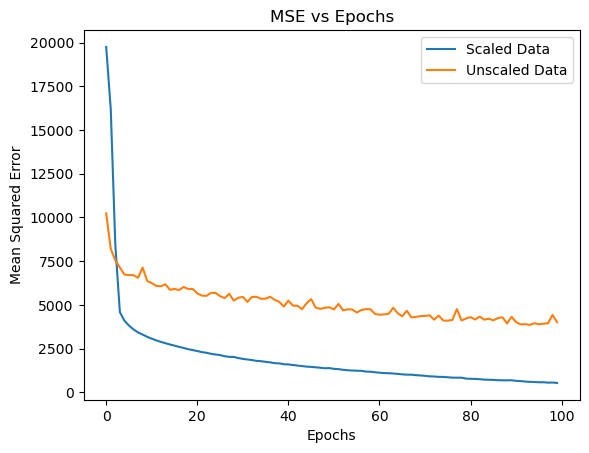

Scaled Data RMSE: 39.25750615665036
Unscaled Data RMSE: 72.79284442680361
Scaled Data R2: 0.8560042334333161
Unscaled Data R2: 0.5049128101567918


In [71]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define the neural network architecture
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model


# Create and train model on scaled data
model_scaled = create_model(X_scaled_df.shape[1])
history_scaled = model_scaled.fit(X_scaled_df, y1, epochs=100, batch_size=32, validation_split = 0.2, verbose=1)

y_pred_scaled = model_scaled.predict(X_test_scaled)
rmse_scaled = calculate_rmse(y_test, y_pred_scaled)

model_unscaled = create_model(X1.shape[1])
history_unscaled = model_unscaled.fit(X1, y1, epochs=100, batch_size=32, validation_split = 0.2, verbose=1)

y_pred_unscaled = model_unscaled.predict(X_test)
rmse_unscaled = calculate_rmse(y_test, y_pred_unscaled)

# Plot RMSE vs epochs for both scaled and unscaled data
plt.plot(history_scaled.history['mse'], label='Scaled Data')
plt.plot(history_unscaled.history['mse'], label='Unscaled Data')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Epochs')
plt.legend()
plt.show()

print("Scaled Data RMSE:", rmse_scaled)
print("Unscaled Data RMSE:", rmse_unscaled)
r2_unscaled = r2 = r2_score(y_test, y_pred_unscaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print("Scaled Data R2:",r2_scaled)
print("Unscaled Data R2:",r2_unscaled)

In [73]:
model_scaled.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 64)             │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,053 (70.52 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,036 (47.02 KB)